In [11]:
# multidimensional arrays
import numpy as np
import math
import pandas as pd
from scipy import stats
from scipy import optimize
from scipy.stats import norm

# inline plots
import matplotlib.pyplot as plt
%matplotlib inline

# nicer figures
import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

# <span style="color:blue">  Exercise 2.1</span>

In [3]:
# reading data from integral.csv
sum_prog, err_prog = np.genfromtxt("integral.csv", dtype=float, delimiter=',', unpack=True)

# reading data from integral_IS.csv
sum_prog_IS, err_prog_IS = np.genfromtxt("integral_IS.csv", dtype=float, delimiter=',', unpack=True)

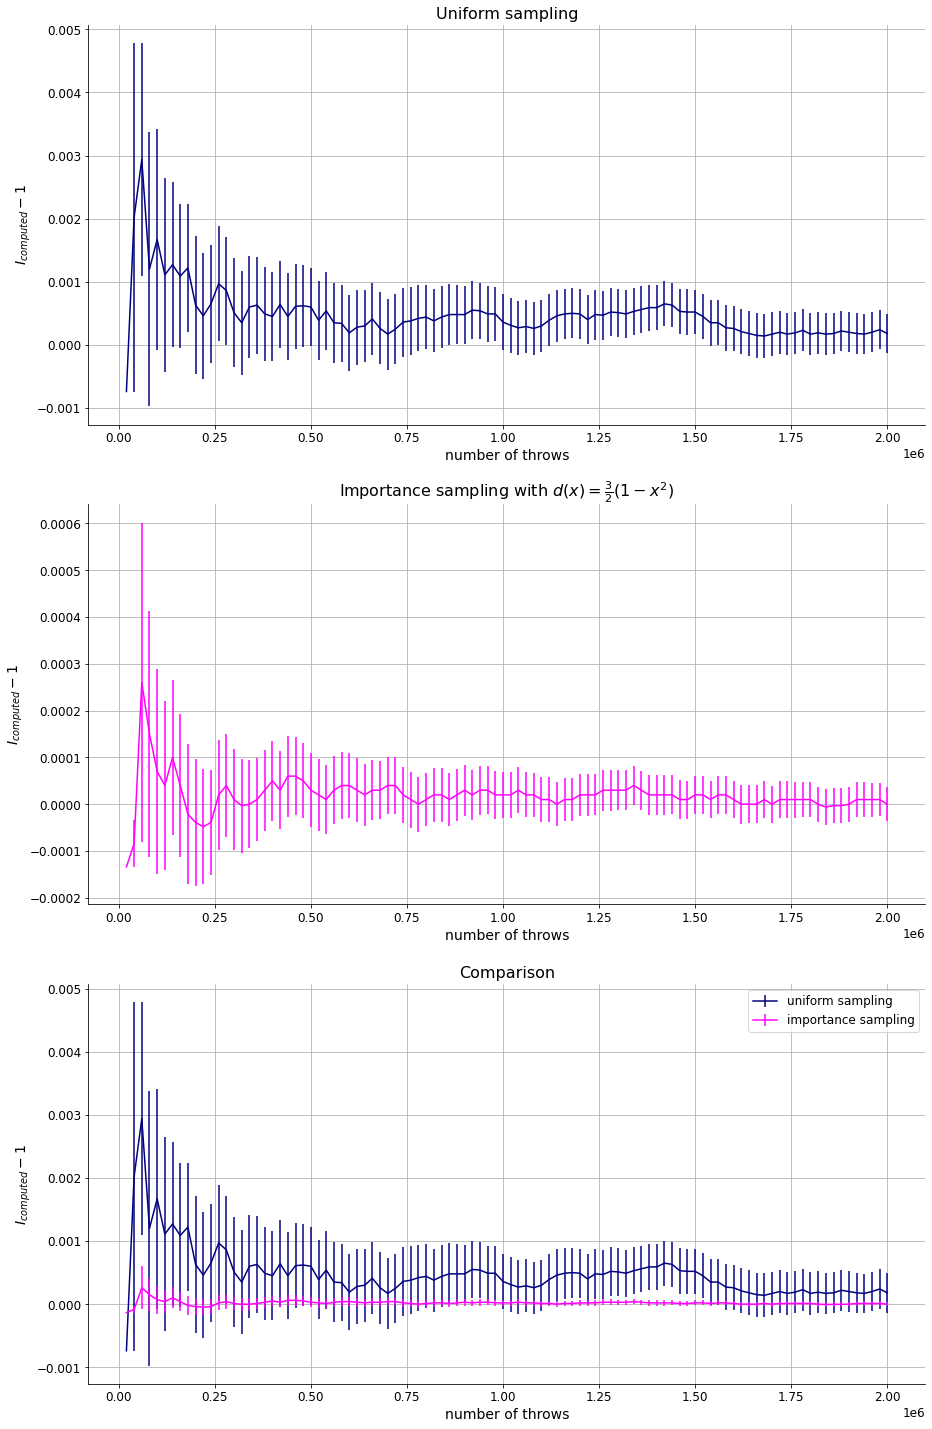

In [10]:
# plot progressive data

M = 2000000
N = 100
L = int(M/N)
x = [ i*L for i in range(1, N+1) ]  # progressive throws

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 25))

ax1.errorbar(x, sum_prog-1, yerr=err_prog, color='navy')
ax1.set_title("Uniform sampling")
ax1.set_xlabel("number of throws")
ax1.set_ylabel(r"$I_{computed} - 1 $")
ax1.grid(True)

ax2.errorbar(x, sum_prog_IS-1, yerr=err_prog_IS, color='fuchsia')
ax2.set_title(r"Importance sampling with $d(x) = \frac{3}{2} (1-x^2)$")
ax2.set_xlabel("number of throws")
ax2.set_ylabel(r"$I_{computed} - 1 $")
ax2.grid(True)

ax3.errorbar(x, sum_prog-1, yerr=err_prog, color='navy', label='uniform sampling')
ax3.errorbar(x, sum_prog_IS-1, yerr=err_prog_IS, color='fuchsia', label='importance sampling')
ax3.set_title("Comparison")
ax3.set_xlabel("number of throws")
ax3.set_ylabel(r"$I_{computed} - 1 $")
ax3.legend()
ax3.grid(True)

The first plot (dark blue) shows the evaluation of the given integral with the uniform sampling method, while the second (neon pink) was made with the importance sampling technique. Both give a result that is consistent with the expected value of 1, but the third plot shows clearly that the importance sampling is way more efficient in terms of reduction of the error and rapidity of convergence.
The importance sampling was carried out with the sampling probabilty given by $$ \frac{3}{2} (1-x^2) $$ This function describes really closely the integrand in the interval of integration (0, 1) and is therefore a good choice to show the improvement using the importance sampling technique, as can be seen in the two plots above.

# <span style="color:blue">  Exercise 2.2</span>

In [22]:
# reading data from RW_discrete.csv

r_ave, r_err = np.genfromtxt("RW_discrete.csv", dtype=float, delimiter=',', unpack=True)

nstep = int(r_err[0])
r_ave = r_ave[1:]
r_err = r_err[1:]

# reading data from RW_continuum.csv

r_ave1, r_err1 = np.genfromtxt("RW_continuum.csv", dtype=float, delimiter=',', unpack=True)

nstep1 = int(r_err1[0])
r_ave1 = r_ave1[1:]
r_err1 = r_err1[1:]

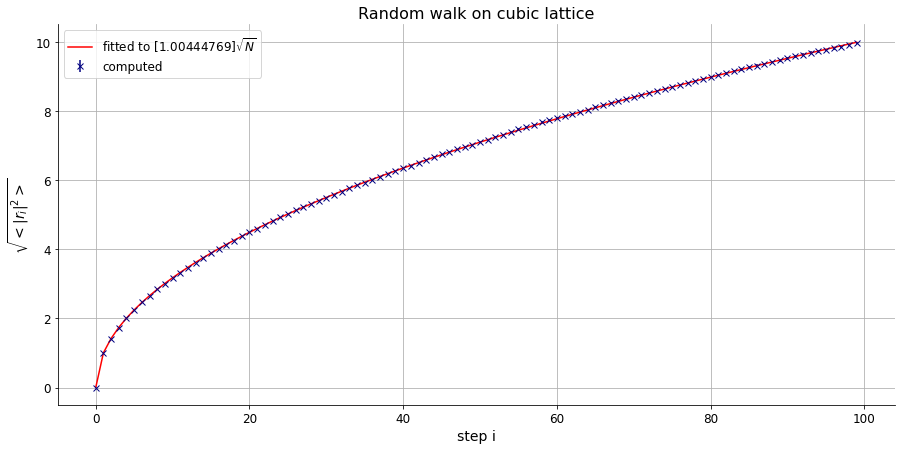

In [23]:
# plot progressive data

x = [ i for i in range(nstep) ]

fig, ax1 = plt.subplots(1, 1, figsize=(15, 7))

ax1.errorbar(x, r_ave,yerr=r_err, color='navy', label='computed',fmt='x')
ax1.set_title(r"Random walk on cubic lattice")
ax1.set_xlabel("step i")
ax1.set_ylabel(r"$\sqrt{<|r_i|^2>}$")
ax1.grid(True)

def fit (t, k):
    return k*np.sqrt(t)

popt, pcov = optimize.curve_fit(fit, x, r_ave)
r_fitted = fit(x, *popt)

ax1.plot(x, r_fitted, color='red', label=f"fitted to "+str(popt)+"$\sqrt{N}$")
ax1.legend()

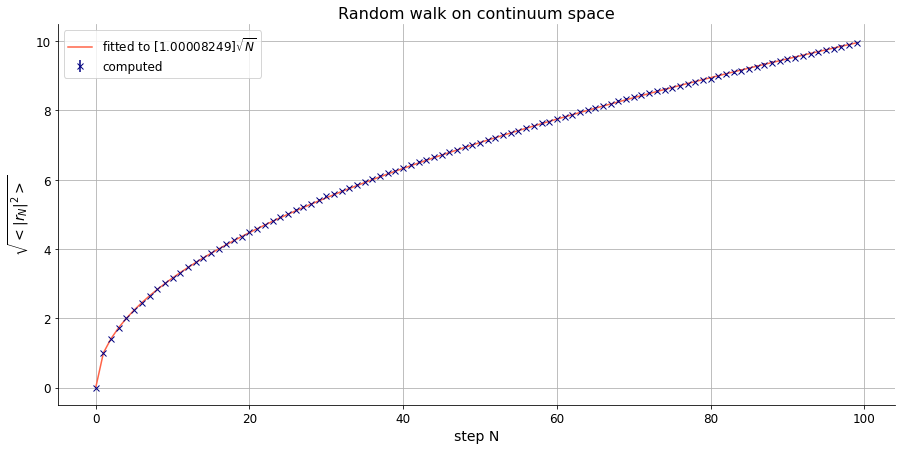

In [26]:
# plot progressive data

x = [ i for i in range(nstep1) ]

fig, ax1 = plt.subplots(1, 1, figsize=(15, 7))

ax1.errorbar(x, r_ave1, yerr=r_err1, color='navy', label='computed', fmt='x')
ax1.set_title(r"Random walk on continuum space")
ax1.set_xlabel("step N")
ax1.set_ylabel(r"$\sqrt{<|r_N|^2>}$")
ax1.grid(True)

def fit (t, k):
    return k*np.sqrt(t)

popt, pcov = optimize.curve_fit(fit, x, r_ave1)
r_fitted = fit(x, *popt)

ax1.plot(x, r_fitted, color='tomato', label=f"fitted to "+str(popt)+"$\sqrt{N}$")
ax1.legend()



Both graphs show the mean distance from the origin of the RW as a function of the number of steps performed. 
    
In the first case the RW is confined to a cubic lattice, while in the second case it is in a continuum of space. In both cases the step was long 1.
    
With a total amount of throws (that is, RWs) as large as 10000, the curve fits almost perfectly to a square root, just like we would expect from the system. 

We know the diffusion equation:
$$ \frac {\partial \rho}{\partial t} = D \frac {\partial^2 \rho}{\partial x^2} $$

We can solve the equation, stating that at initial time $\rho(x, t=0) = \delta (x)$ and using the Fourier transform and we conclude that the solution for $\rho$ is a gaussian distribution with mean = 0 and variance = 2Dt. In our simulation $ t = N\tau$ (discrete steps), therefore we see that the expected dispersion is proportional to $\sqrt N$, in particular we have $<|r_N|^2> = \sqrt {2D \tau N}$.

From the model of the random walk we know that $\sigma^2 =Na^2$ after N steps. Thanks to the CLT we can identify $Na^2=2DN\tau$ and therefore we shall expect $<|r_N|^2> = \sqrt N$, that is exactly what the two plots above show. 

This is why we can say that these simulations confirm a diffusive behaviour.